In [46]:
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn import metrics

import warnings
warnings.filterwarnings('always')

In [47]:
df = pd.read_csv('gender-prediction.csv')
df

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
0,71,176,yes,short,44,no,black,male
1,68,165,no,bald,41,no,black,male
2,62,132,no,medium,37,yes,blue,female
3,65,138,no,long,38,no,gray,female
4,70,197,yes,medium,43,no,gray,male
...,...,...,...,...,...,...,...,...
75,65,99,no,short,39,yes,green,female
76,61,98,no,short,37,no,brown,female
77,67,119,yes,short,40,no,black,male
78,70,190,yes,medium,43,no,gray,male


In [48]:
male_count = 0
female_count = 0

for gender in df['gender']:
    if gender == "male":
        male_count+=1
    else:
        female_count+=1
        
        
print("Male instances:", male_count)
print("Female instances:", female_count)

Male instances: 46
Female instances: 34


## Question 2 part 1

In [49]:
labels = preprocessing.LabelEncoder()

beard_encoded = labels.fit_transform(df['beard'])
hair_length_encoded = labels.fit_transform(df['hair_length'])
scarf_encoded = labels.fit_transform(df['scarf'])
eye_color_encoded = labels.fit_transform(df['eye_color'])

x_encoded = list(zip(df['height'], df['weight'], beard_encoded, hair_length_encoded, df['shoe_size'], scarf_encoded, eye_color_encoded))

In [50]:
y = df['gender']
y_encoded = labels.fit_transform(y)

In [51]:
X_train, x_test, Y_train, y_test = train_test_split(x_encoded, y_encoded, test_size = 0.33, random_state = 2)

In [52]:
random_forest_model = RandomForestClassifier()
svc_model = SVC()
mlp_model = MLPClassifier()

In [54]:
random_forest_model.fit(X_train,Y_train)
svc_model.fit(X_train,Y_train)
mlp_model.fit(X_train,Y_train)

MLPClassifier()

In [55]:
random_forest_prediction = random_forest_model.predict(x_test)
svc_prediction = svc_model.predict(x_test)
mlp_prediction = mlp_model.predict(x_test)

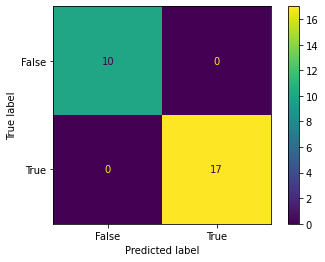

In [56]:
confusion_matrix_rf = metrics.confusion_matrix(y_test, random_forest_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf, display_labels = [False, True])
cm_display.plot()
plt.show()

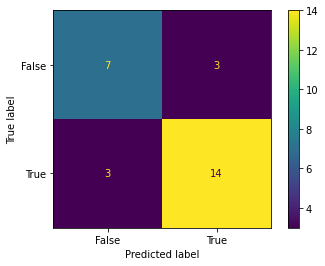

In [57]:
confusion_matrix_svc = metrics.confusion_matrix(y_test, svc_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svc, display_labels = [False, True])
cm_display.plot()
plt.show()

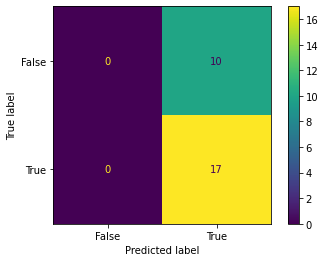

In [58]:
confusion_matrix_mlp = metrics.confusion_matrix(y_test, mlp_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_mlp, display_labels = [False, True])
cm_display.plot()
plt.show()

In [59]:
random_forest_model_acc = accuracy_score(y_test, random_forest_prediction)*100
svc_model_acc = accuracy_score(y_test, svc_prediction)*100
mlp_model_acc = accuracy_score(y_test, mlp_prediction)*100
print("Random forest accuracy", random_forest_model_acc, "%")
print("Support Vector Machine accuracy", svc_model_acc, "%")
print("Multilayer Perceptron accuracy", mlp_model_acc, "%")

print('\n')

random_forest_model_prec = precision_score(y_test, random_forest_prediction)*100
svc_model_prec = precision_score(y_test, svc_prediction)*100
mlp_model_prec = precision_score(y_test, mlp_prediction)*100
print("Random forest precision score", random_forest_model_prec, "%")
print("Support Vector Machine precision score", svc_model_prec, "%")
print("Multilayer Perceptron precision score", mlp_model_prec, "%")

print('\n')

random_forest_model_rec = recall_score(y_test, random_forest_prediction)*100
svc_model_rec = recall_score(y_test, svc_prediction)*100
mlp_model_rec = recall_score(y_test, mlp_prediction)*100
print("Random forest recall score", random_forest_model_rec, "%")
print("Support Vector Machine recall score", svc_model_rec, "%")
print("Multilayer Perceptron recall score", mlp_model_rec, "%")

print('\n')

random_forest_model_f1 = f1_score(y_test, random_forest_prediction)*100
svc_model_f1 = f1_score(y_test, svc_prediction)*100
mlp_model_f1 = f1_score(y_test, mlp_prediction)*100
print("Random forest f1_score", random_forest_model_f1, "%")
print("Support Vector Machinef1_score", svc_model_f1, "%")
print("Multilayer Perceptron f1_score", mlp_model_f1, "%")

Random forest accuracy 100.0 %
Support Vector Machine accuracy 77.77777777777779 %
Multilayer Perceptron accuracy 62.96296296296296 %


Random forest precision score 100.0 %
Support Vector Machine precision score 82.35294117647058 %
Multilayer Perceptron precision score 62.96296296296296 %


Random forest recall score 100.0 %
Support Vector Machine recall score 82.35294117647058 %
Multilayer Perceptron recall score 100.0 %


Random forest f1_score 100.0 %
Support Vector Machinef1_score 82.35294117647058 %
Multilayer Perceptron f1_score 77.27272727272727 %


## Question 2 Part 2

In [60]:
#using train/test split ratio of 80/20

X_train, x_test, Y_train, y_test = train_test_split(x_encoded, y_encoded, test_size = 0.2, random_state = 2)

In [61]:
random_forest_model = RandomForestClassifier()
svc_model = SVC()
mlp_model = MLPClassifier()

In [62]:
random_forest_model.fit(X_train,Y_train)
svc_model.fit(X_train,Y_train)
mlp_model.fit(X_train,Y_train)

MLPClassifier()

In [63]:
random_forest_prediction = random_forest_model.predict(x_test)
svc_prediction = svc_model.predict(x_test)
mlp_prediction = mlp_model.predict(x_test)

In [64]:
random_forest_model_acc = accuracy_score(y_test, random_forest_prediction)*100
svc_model_acc = accuracy_score(y_test, svc_prediction)*100
mlp_model_acc = accuracy_score(y_test, mlp_prediction)*100
print("Random forest accuracy", random_forest_model_acc, "%")
print("Support Vector Machine accuracy", svc_model_acc, "%")
print("Multilayer Perceptron accuracy", mlp_model_acc, "%")

Random forest accuracy 100.0 %
Support Vector Machine accuracy 81.25 %
Multilayer Perceptron accuracy 81.25 %


## Question 2 Part 4

In [65]:
# 2 attributes believed to be most “powerful”
# Beard and scarf
#remvoing these two attributes

In [66]:
x_encoded = list(zip(df['height'], df['weight'], hair_length_encoded, df['shoe_size'], eye_color_encoded))
y = df['gender']
y_encoded = labels.fit_transform(y)

In [67]:
X_train, x_test, Y_train, y_test = train_test_split(x_encoded, y_encoded, test_size = 0.2, random_state = 2)

In [68]:
random_forest_model = RandomForestClassifier()
svc_model = SVC()
mlp_model = MLPClassifier()

In [69]:
random_forest_model.fit(X_train,Y_train)
svc_model.fit(X_train,Y_train)
mlp_model.fit(X_train,Y_train)

MLPClassifier()

In [70]:
random_forest_prediction = random_forest_model.predict(x_test)
svc_prediction = svc_model.predict(x_test)
mlp_prediction = mlp_model.predict(x_test)

In [71]:
random_forest_model_acc = accuracy_score(y_test, random_forest_prediction)*100
svc_model_acc = accuracy_score(y_test, svc_prediction)*100
mlp_model_acc = accuracy_score(y_test, mlp_prediction)*100
print("Random forest accuracy", random_forest_model_acc, "%")
print("Support Vector Machine accuracy", svc_model_acc, "%")
print("Multilayer Perceptron accuracy", mlp_model_acc, "%")

print('\n')

random_forest_model_prec = precision_score(y_test, random_forest_prediction)*100
svc_model_prec = precision_score(y_test, svc_prediction)*100
mlp_model_prec = precision_score(y_test, mlp_prediction)*100
print("Random forest precision score", random_forest_model_prec, "%")
print("Support Vector Machine precision score", svc_model_prec, "%")
print("Multilayer Perceptron precision score", mlp_model_prec, "%")

print('\n')

random_forest_model_rec = recall_score(y_test, random_forest_prediction)*100
svc_model_rec = recall_score(y_test, svc_prediction)*100
mlp_model_rec = recall_score(y_test, mlp_prediction)*100
print("Random forest recall score", random_forest_model_rec, "%")
print("Support Vector Machine recall score", svc_model_rec, "%")
print("Multilayer Perceptron recall score", mlp_model_rec, "%")

print('\n')

random_forest_model_f1 = f1_score(y_test, random_forest_prediction)*100
svc_model_f1 = f1_score(y_test, svc_prediction)*100
mlp_model_f1 = f1_score(y_test, mlp_prediction)*100
print("Random forest f1_score", random_forest_model_f1, "%")
print("Support Vector Machinef1_score", svc_model_f1, "%")
print("Multilayer Perceptron f1_score", mlp_model_f1, "%")

Random forest accuracy 100.0 %
Support Vector Machine accuracy 81.25 %
Multilayer Perceptron accuracy 75.0 %


Random forest precision score 100.0 %
Support Vector Machine precision score 81.81818181818183 %
Multilayer Perceptron precision score 75.0 %


Random forest recall score 100.0 %
Support Vector Machine recall score 90.0 %
Multilayer Perceptron recall score 90.0 %


Random forest f1_score 100.0 %
Support Vector Machinef1_score 85.71428571428572 %
Multilayer Perceptron f1_score 81.81818181818183 %


## Question 3

In [72]:
x_encoded = list(zip(df['height'], df['weight'], beard_encoded, hair_length_encoded, df['shoe_size'], scarf_encoded, eye_color_encoded))
y = df['gender']
y_encoded = labels.fit_transform(y)

In [73]:
#Monte Carlo cross-validation
monte_carlo = ShuffleSplit(n_splits=4,test_size=0.33,random_state=2)

In [74]:
decision_tree_model = DecisionTreeClassifier()

In [75]:
monte_carlo_acc = cross_val_score(decision_tree_model,x_encoded,y_encoded,cv=monte_carlo).mean() * 100
monte_carlo_f1 = cross_val_score(decision_tree_model,x_encoded,y_encoded, scoring="f1", cv=monte_carlo).mean() * 100
print("Monte Carlo cross-validation accuracy", monte_carlo_acc, "%")
print("Monte Carlo cross-validation F1 score", monte_carlo_f1, "%")

Monte Carlo cross-validation accuracy 96.2962962962963 %
Monte Carlo cross-validation F1 score 96.66481275491287 %


In [76]:
#Leave P-Out cross-validation
lpo = LeavePOut(2)
lpo.get_n_splits(x_encoded)

3160

In [77]:
decision_tree_model = DecisionTreeClassifier()

In [78]:
leave_pout_acc = cross_val_score(decision_tree_model,x_encoded,y_encoded,cv=lpo).mean() *100
leave_pout_f1 = cross_val_score(decision_tree_model,x_encoded,y_encoded,cv=lpo, scoring="f1_weighted").mean() * 100
print("Leave P-Out cross-validation accuracy", leave_pout_acc, "%")
print("Leave P-Out cross-validation F1 score", leave_pout_f1, "%")

Leave P-Out cross-validation accuracy 94.14556962025317 %
Leave P-Out cross-validation F1 score 94.19831223628692 %


## Question 4

In [79]:
df2 = pd.read_csv('gender-prediction-new.csv')
df2

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
0,71,176,yes,short,44,no,black,male
1,68,165,no,bald,41,no,black,male
2,62,132,no,medium,37,yes,blue,female
3,65,138,no,long,38,no,gray,female
4,70,197,yes,medium,43,no,gray,male
...,...,...,...,...,...,...,...,...
80,71,157,yes,long,42,no,brown,male
81,69,158,yes,medium,43,no,gray,male
82,67,152,yes,short,43,no,black,male
83,63,100,no,long,38,no,brown,female


In [80]:
train_data = df2.iloc[:80]
train_data

test_data = df2.iloc[80:]
test_data

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
80,71,157,yes,long,42,no,brown,male
81,69,158,yes,medium,43,no,gray,male
82,67,152,yes,short,43,no,black,male
83,63,100,no,long,38,no,brown,female
84,65,130,no,medium,40,yes,black,female


In [81]:
labels = preprocessing.LabelEncoder()

train_beard_encoded = labels.fit_transform(train_data['beard'])
train_hair_length_encoded = labels.fit_transform(train_data['hair_length'])
train_scarf_encoded = labels.fit_transform(train_data['scarf'])
train_eye_color_encoded = labels.fit_transform(train_data['eye_color'])

In [82]:
X_train = list(zip(train_data['height'], train_data['weight'], train_beard_encoded, train_hair_length_encoded, train_data['shoe_size'], train_scarf_encoded, train_eye_color_encoded))
Y_train = train_data['gender']

In [83]:
test_beard_encoded = labels.fit_transform(test_data['beard'])
test_hair_length_encoded = labels.fit_transform(test_data['hair_length'])
test_scarf_encoded = labels.fit_transform(test_data['scarf'])
test_eye_color_encoded = labels.fit_transform(test_data['eye_color'])

In [84]:
x_test = list(zip(test_data['height'], test_data['weight'], test_beard_encoded, test_hair_length_encoded, test_data['shoe_size'], test_scarf_encoded, test_eye_color_encoded))
y_test = test_data['gender']

In [85]:
gnb_model = GaussianNB()

In [86]:
gnb_model.fit(X_train,Y_train)

GaussianNB()

In [87]:
prediction = gnb_model.predict(x_test)

In [88]:
model_acc = accuracy_score(y_test, prediction)*100
model_precision = precision_score(y_test, prediction, average=None).mean() *100
model_recall = recall_score(y_test, prediction, average=None).mean() *100
print("Gaussian Naive Bayes accuracy = ", model_acc, "%")
print("Gaussian Naive Bayes precision = ", model_precision, "%")
print("Gaussian Naive Bayes recall = ", model_recall, "%")

Gaussian Naive Bayes accuracy =  100.0 %
Gaussian Naive Bayes precision =  100.0 %
Gaussian Naive Bayes recall =  100.0 %
